## Solutions Problem Set 2 - Computational Questions

## Additional Exercises

### Exercise 1

             mse1    mse2    mse3
[1,] 7.852797e-23 1812712 1551349
       mspe1   mspe2   mspe3
[1,] 3945007 2349223 2688203
             mse1    mse2    mse3
[1,] 7.852797e-23 1812712 1551349


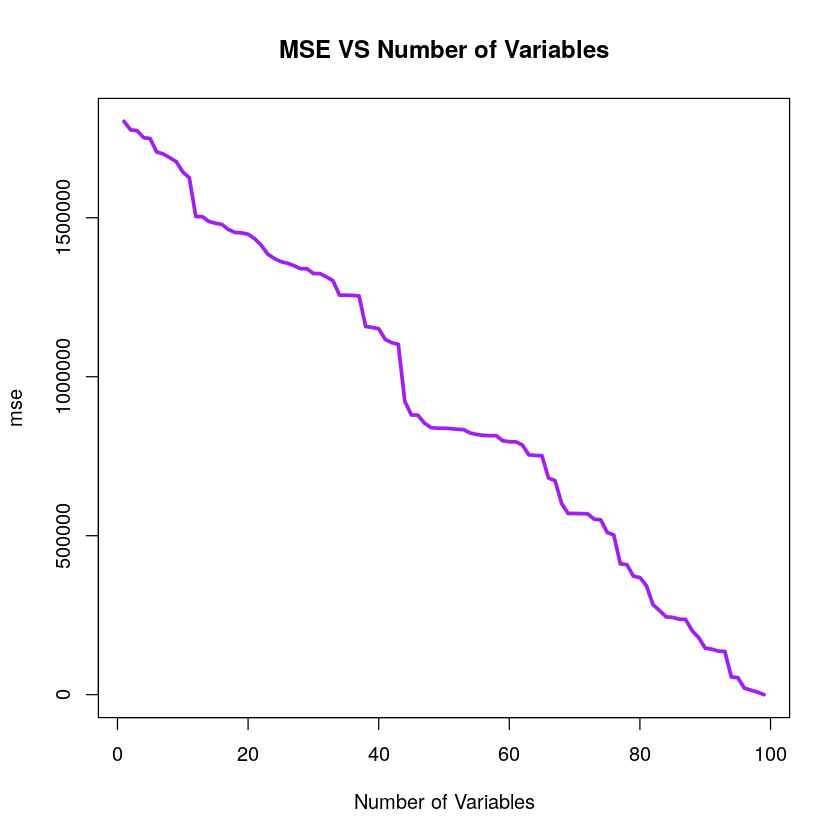

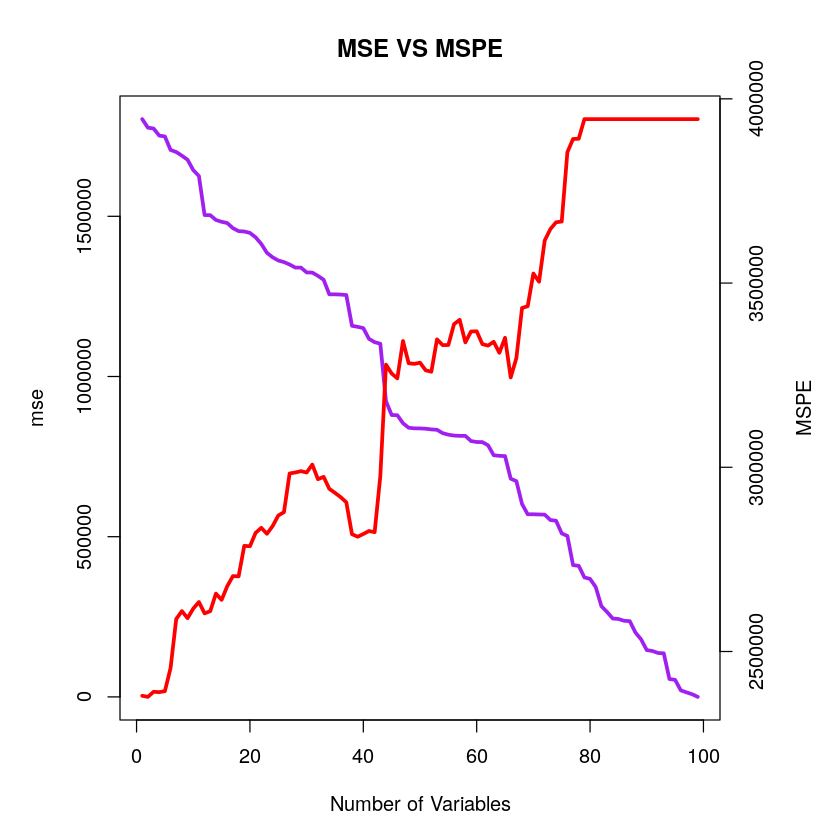

In [2]:
set.seed(123)
n <- 100
p <-  99
x <- matrix(runif(n*p, min=-100,max=100), n , p)

## Generate the output variable as a linear combination of x

## With jitter() you add random noise
y <-  jitter(3 + 10*x[,99], factor=10000)


## Pick randomly 1/5th of observastions
ii <- sample(nrow(x), floor(nrow(x)/5))

## Built a test and training set

data.te <- x[ii, ]
data.tr <- x[-ii,]
y.te <- y[ii]
y.tr <- y[-ii]



#### Solution

full <- lm(y~x) ## All variables
null <- lm(y~1) ## No variables

truth <- lm(y~x[,99]) ## true relationship

## Evaluate the MSE of each model


mse1 <- mean((y-predict(full))^2)
mse2 <- mean((y-predict(null))^2)
mse3 <- mean((y-predict(truth))^2)

print(cbind(mse1,mse2,mse3))


## See the behaviour of the mse in function of the number of variables

## store MSE, construct each regression on columns of X

mse <- rep(NA, length=99)
for (i in 1:99){ 
  data <- x[,c(1:i)]
  reg <- lm(y~data)
  mse[i] <- mean((y-predict(reg))^2)
  
}

plot(cbind(c(1:99), mse),  type="n", main="MSE VS Number of Variables", xlab="Number of Variables")

lines(cbind(c(1:99), mse), col="purple", lwd=3)

## Repeat the process but now with a test and training set



set.seed(123)

## Pick randomly 1/5th of observastions
ii <- sample(nrow(x), floor(nrow(x)/5))

## Built a test and training set

data.te <- x[ii, ]
data.tr <- x[-ii,]
y.te <- y[ii]
y.tr <- y[-ii]


full <- lm(y.tr~data.tr) ## All variables
null <- lm(y.tr~1) ## No variables

truth <- lm(y.tr~data.tr[,99]) ## true relationship

## Evaluate the MSE of each model (again)


mspe1 <- mean((y.te-predict(full, newx=data.te))^2)
mspe2 <- mean((y.te-predict(null, newx= data.te))^2)
mspe3 <- mean((y.te-predict(truth, newx=data.te))^2)

print(cbind(mspe1,mspe2,mspe3))

## Compare
print(cbind(mse1,mse2,mse3))

## store MSE, construct each regression on columns of X

mspe <- rep(NA, length=99)
for (i in 1:99){ 
  data <- data.tr[,c(1:i)]
  reg <- lm(y.tr~data)
  mspe[i] <- mean((y.te-predict(reg, newx = data.te[,c(1:i)]))^2)
  
}





par(mar = c(5,5,4,5))
plot(cbind(c(1:99), mse),  type="n", main="MSE VS MSPE", xlab="Number of Variables")
lines(cbind(c(1:99), mse), col="purple", lwd=3)


par(new = T)
plot(cbind(c(1:99), mspe),  type="n", main=NA, xlab=NA, ylab=NA, axes=F)
axis(side = 4)
mtext(side = 4, line = 3, 'MSPE')
lines(cbind(c(1:99), mspe), col="red", lwd=3)


### Exercise 2

In [4]:
wine.white <- read.table("./data/wine-white.txt")


names(wine.white)

n <- nrow(wine.white)
k <- 10
y <- wine.white$quality
ii <- sample(rep(1:k, length= n))
pr1 <- pr2 <-  pr3 <- numeric(length(y))
set.seed(123)

for (j in 1:k){
  hold <- (ii == j)
  train <- (ii != j)
  
  reg1 <- lm(quality~., data=wine.white[train,]) 
  reg2 <- lm(quality~pH+sulphates, data=wine.white[train,] ) 
  reg3 <- lm(quality~pH+sulphates+density+chlorides, data=wine.white[train,] )
  
  
  pr1[hold] <- predict(reg1, newdata= wine.white[hold,]) 
  pr2[hold] <- predict(reg2, newdata= wine.white[hold,])
  pr3[hold] <- predict(reg3, newdata= wine.white[hold,])}

mean((pr1 - y)^2)
mean((pr2 - y)^2)
mean((pr3 - y)^2)


print(cbind(mean(mspe1),mean(mspe2),mean(mspe3)))



[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

[1] 0.5686333

[1] 0.7762534

[1] 0.6905728

          [,1]      [,2]      [,3]
[1,] 0.5685367 0.7763299 0.6911663


### Exercise 3

In [5]:
student <- read.table("./data/student.matG.txt")

## Run Regression
reg1 <- lm(Walc~school, data=student)
reg2 <- lm(Walc~ school + age + health + school*health , data=student) 
## See the results
summary(reg1)


Call:
lm(formula = Walc ~ school, data = student)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5217 -1.2607 -0.2607  0.7393  2.7393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.26074    0.06888  32.821   <2e-16 ***
schoolMS     0.26099    0.20184   1.293    0.197    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.287 on 393 degrees of freedom
Multiple R-squared:  0.004236,	Adjusted R-squared:  0.001703 
F-statistic: 1.672 on 1 and 393 DF,  p-value: 0.1968


In [6]:
xm <- model.matrix(~. ,data=student[,-27])[,-1]  
y <- student[,27]

## Use this functions to standardize
standard_for_dummy <- function (k){ if (length(k[!duplicated(k)])==2)
{ return(1)}                               
return(sd(k))                                                      }
sd.tr <- apply(xm, 2, standard_for_dummy) 
mu_for_dummy <- function (k){ if (length(k[!duplicated(k)])==2)
{ return(0.5)}                               
mean(k)      }
mu.tr <-apply(xm, 2, mu_for_dummy) 
## New covariate matrix
xmn <- scale(xm, center = mu.tr, scale=sd.tr)
## Set your lambda 
lambdas.rr <- exp(seq(-4, 4, length=50))

In [9]:
k <- 10
library(glmnet)
lr.cv <- cv.glmnet(x=as.matrix(xmn), y=student[,27], lambda=lambdas.rr, nfolds=k, alpha=0)
fit <- glmnet(x=as.matrix(xmn), y=y, lambda=lr.cv$lambda.min, alpha=0)

In [10]:
## Cross validation 
set.seed(123)

n <- length(y)
k <- 10
## Split sample in folders
ii <- sample(rep(1:k, length= n))
## create accumulators 
pr.1 <- pr.2 <- pr.l <- rep(NA, length(y))
## cross validate
for (j in 1:k){

hold <- (ii == j)
train <- (ii != j)
xx.tr <- xmn[train,]
y.tr <-  y[train]
xx.te <- xmn[hold,]
reg1 <- lm(Walc~school, data=student[train,])
reg2 <- lm(Walc~ school + age + health + school*health , data=student[train,]) 
### find the best ridge on the TRAINING SET!
fit <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, lambda=lambdas.rr, nfolds=k, alpha=0)
## Store predictions
pr.1[hold] <- predict(reg1, newdata=student[hold,])
pr.2[hold] <- predict(reg2, newdata=student[hold,])
pr.l[hold] <- predict(fit, newx=xx.te)
}

## report predictions
mspe1 <- mean((pr.1-y)^2)
mspe2 <- mean((pr.2-y)^2)
mspe.ridge <- mean((pr.l-y)^2)
print(cbind(mspe1, mspe2, mspe.ridge))

        mspe1    mspe2 mspe.ridge
[1,] 1.655833 1.650803   1.294635


## Exercise Book

[1] 0.8351212


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05



Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06



Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05



Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06



Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05



Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


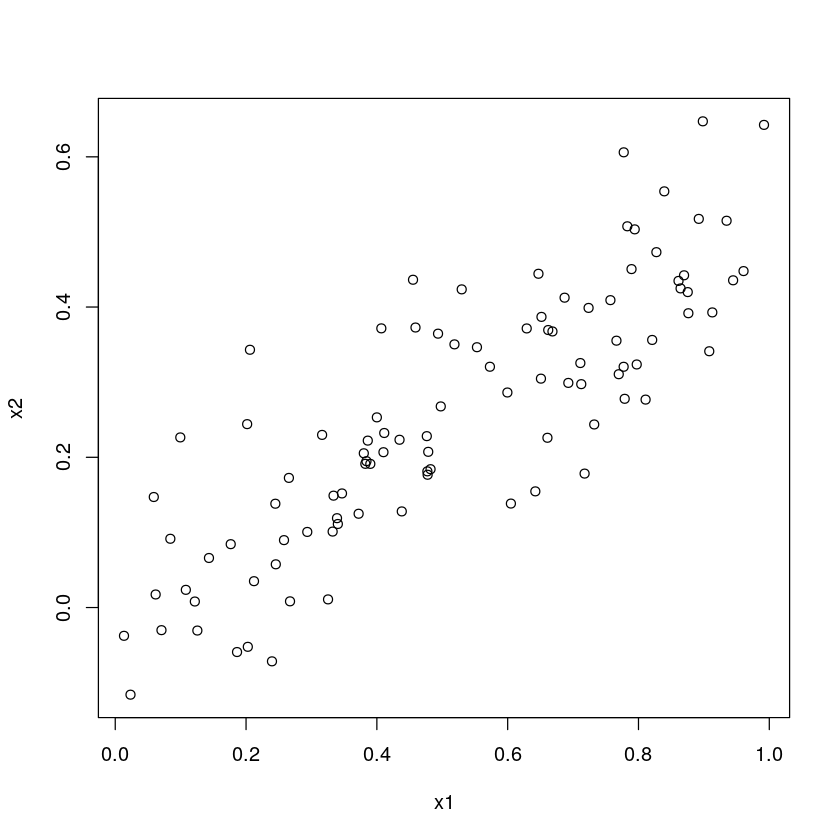

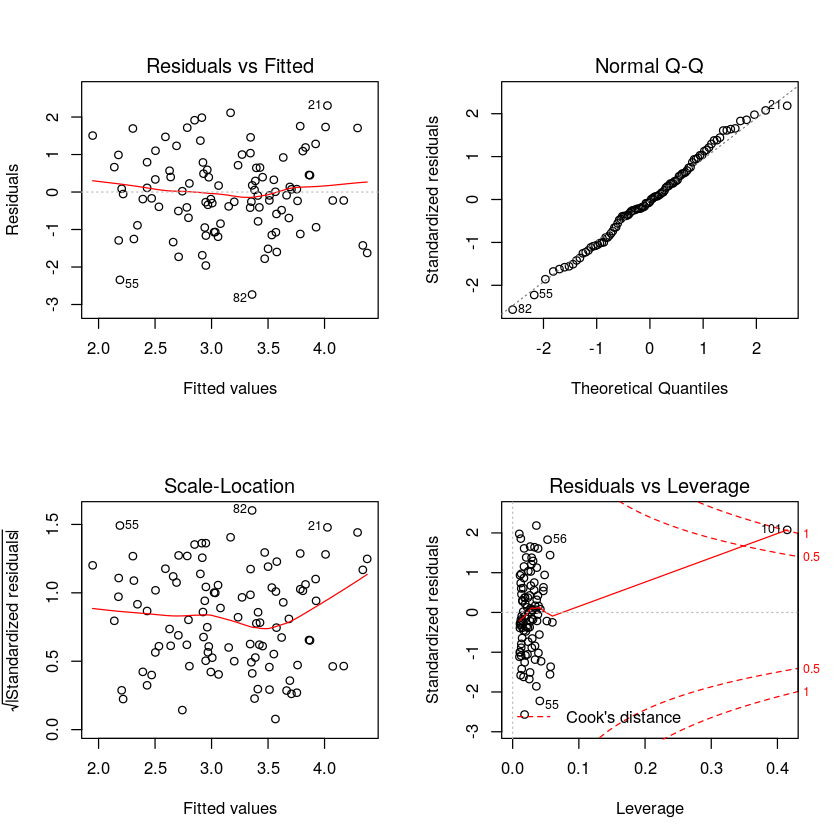

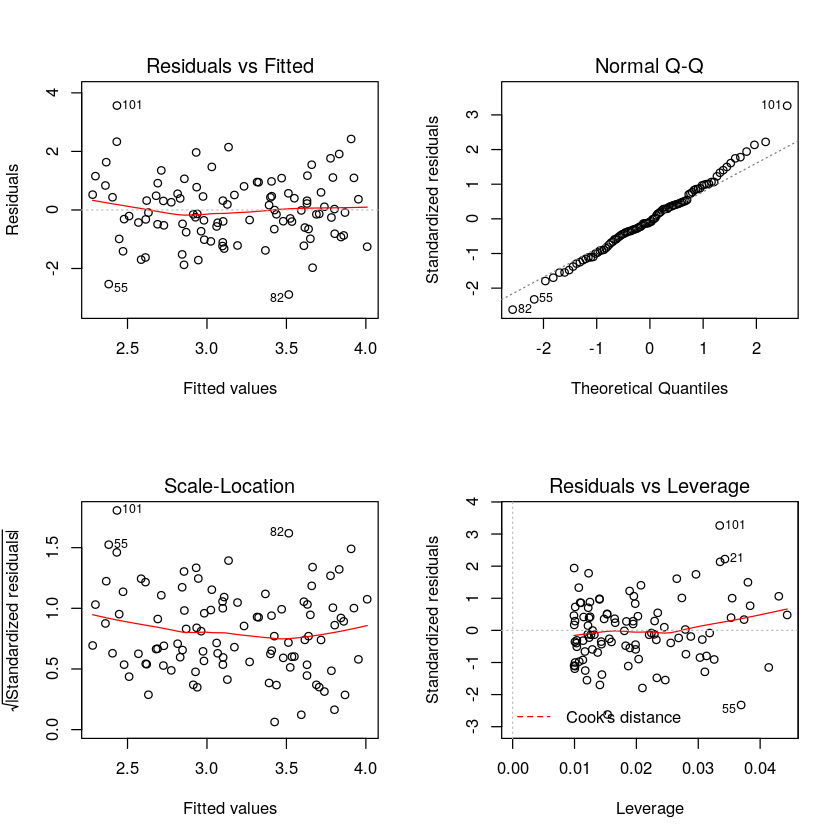

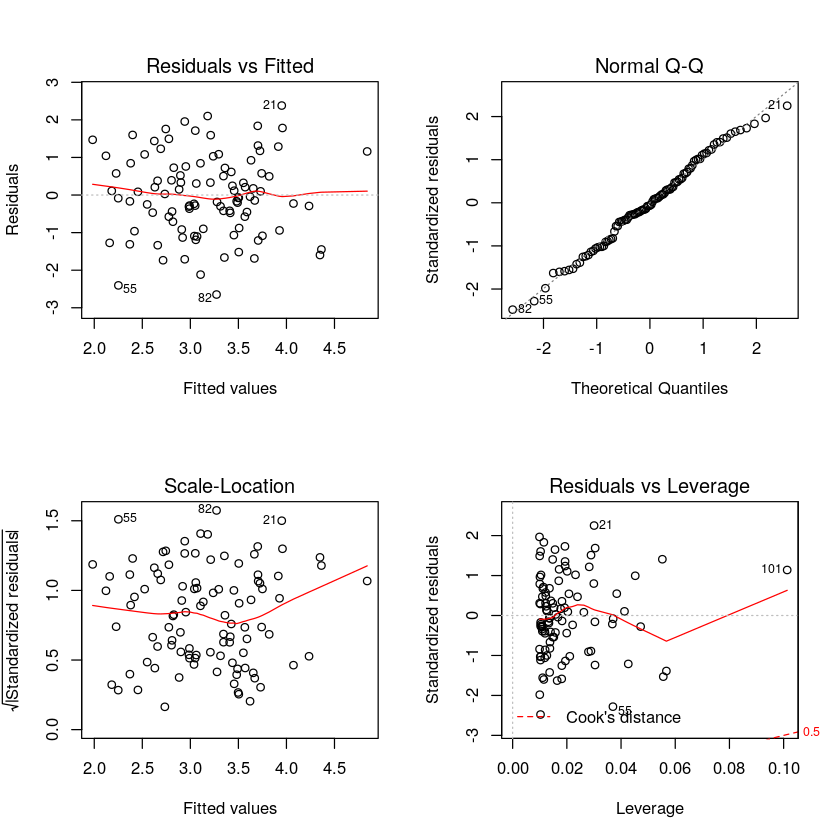

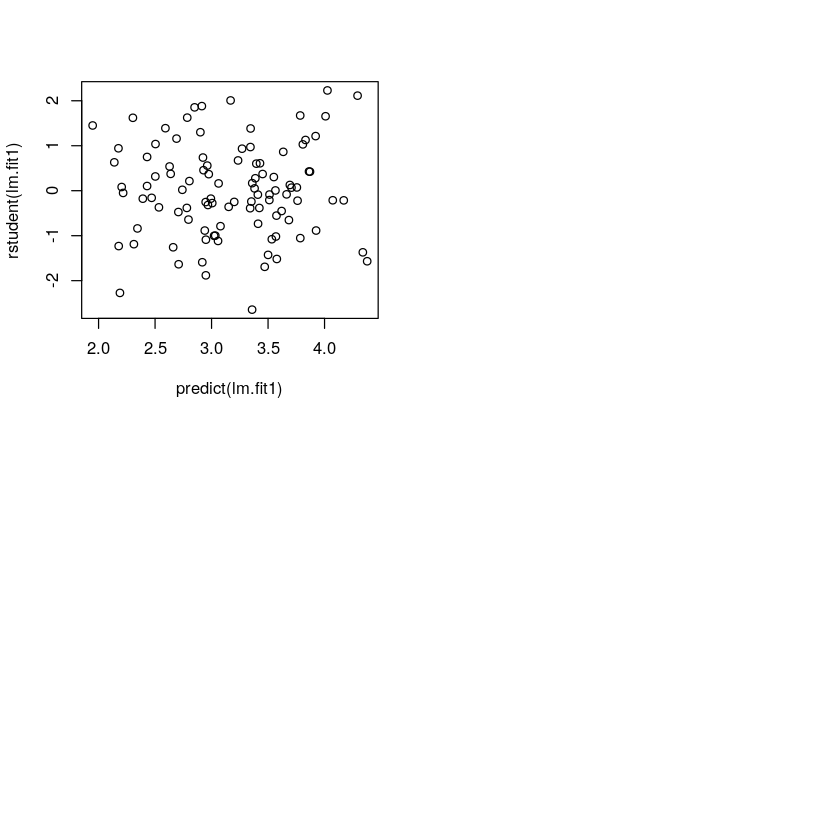

In [11]:
set.seed(1)
x1 = runif(100)
x2 = 0.5 * x1 + rnorm(100)/10
y = 2 + 2*x1 + 0.3*x2 + rnorm(100)

## b.
cor(x1, x2)
plot(x1, x2)

## c.
lm.fit = lm(y~x1+x2)
summary(lm.fit)

## d.

lm.fit = lm(y~x1)
summary(lm.fit)

## e.

lm.fit = lm(y~x2)
summary(lm.fit)

## f.No - they are collinear we cannot distinguish the effects when both are included in the regression


## g. 
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)
lm.fit1 = lm(y~x1+x2)
summary(lm.fit1)

lm.fit2 = lm(y~x1)
summary(lm.fit2)

lm.fit3 = lm(y~x2)
summary(lm.fit3)

par(mfrow=c(2,2))
plot(lm.fit1)

par(mfrow=c(2,2))
plot(lm.fit2)

par(mfrow=c(2,2))
plot(lm.fit3)

plot(predict(lm.fit1), rstudent(lm.fit1))